In [1]:
#Limpeza e tratamento de dados

In [42]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [43]:
#importando dados
dataset = pd.read_csv("Churn.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [44]:
#verificando tamanho do dadaset
dataset.shape

(999, 12)

In [45]:
#atribuindo nome às colunas
dataset.columns = ["Id", "score", "Estado", "Gênero", "Idade", "Patrimônio", "Saldo", "Produtos", "TemCartCrédito", "Ativo", "Salário", "Saiu"
    ]
dataset.head()

,Id,score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [46]:
#explorando dados
#estado
estado = dataset.groupby(['Estado']).size()
estado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [47]:
#OBSERVAÇÕES: alguns Estados não existem (RP, TD)

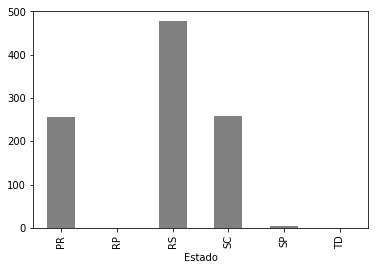

In [48]:
#plotando os dados para melhor visualização
estado.plot.bar(color = 'gray')

In [49]:
#explorando dados
#gênero
genero = dataset.groupby(['Gênero']).size()
genero

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [50]:
#OBSERVAÇÕES: o mesmo tipo de dado escrito de maneiras diferentes

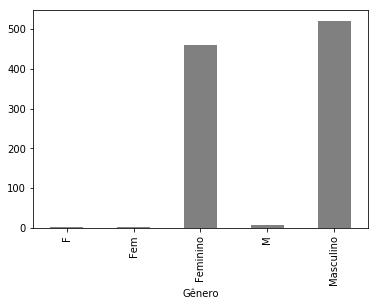

In [51]:
#plotando os dados para melhor visualização
genero.plot.bar(color = 'gray')

In [52]:
#explorando dados
#score
dataset['score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'score')

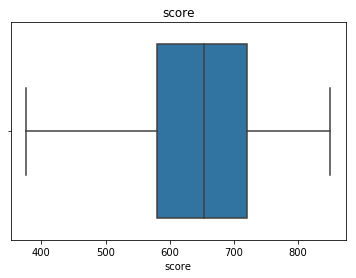

In [53]:
#plotando boxplot
srn.boxplot(dataset['score']).set_title('score')

Text(0.5, 1.0, 'score')

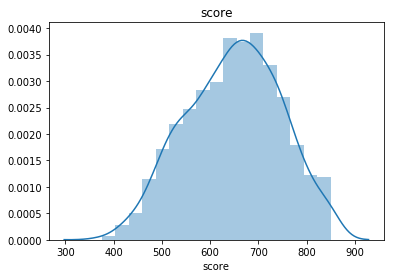

In [54]:
#plotando gráfico de distribuição
srn.distplot(dataset['score']).set_title('score')

In [55]:
#explorando dados
#idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [56]:
#OBSERVAÇÕES: idades com valores negativos e idades acima do normal

Text(0.5, 1.0, 'Idade')

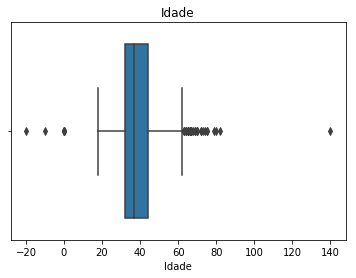

In [57]:
#plotando boxplot
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

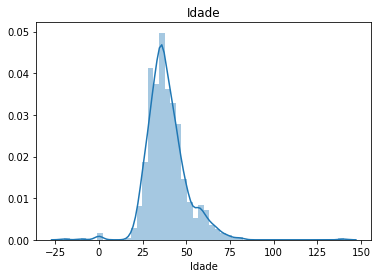

In [58]:
#plotando gráfico de distribuição
srn.distplot(dataset['Idade']).set_title('Idade')

In [59]:
#explorando dados
#saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

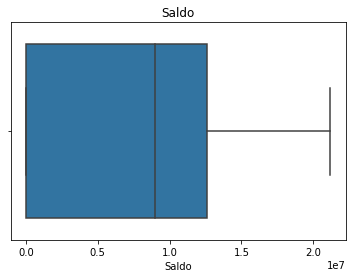

In [60]:
#plotando boxplot
srn.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

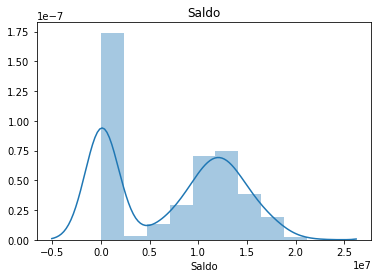

In [61]:
#plotando gráfico de distribuição
srn.distplot(dataset['Saldo']).set_title('Saldo')

In [62]:
#explorando dados
#salário
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

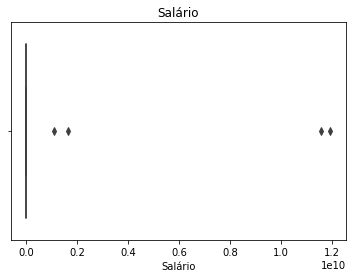

In [63]:
#plotando boxplot
srn.boxplot(dataset['Salário']).set_title('Salário')

In [64]:
#buscando valores NaN
dataset.isnull().sum()

Id                0
score             0
Estado            0
Gênero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCartCrédito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

In [65]:
#tratando os dados
#os valores NaN encontrados na coluna "Salário" podem ser substituídos pela mediana
mediana = sts.median(dataset['Salário'])
dataset['Salário'].fillna(mediana, inplace = True)
dataset['Salário'].isnull().sum()

0

In [66]:
#tratando os dados
#os valores NaN encontrados na coluna "Gênero" podem ser substituídos pela moda (moda = Masculino)
dataset['Gênero'].fillna('Masculino', inplace = True)
dataset['Gênero'].isnull().sum()

0

In [67]:
#tratando os dados
#padronizando as classificações de gênero
dataset.loc[dataset['Gênero'] == 'M', 'Gênero'] = "Masculino"
dataset.loc[dataset['Gênero'].isin(['Fem', 'F']), 'Gênero'] = "Feminino"

genero2 = dataset.groupby(['Gênero']).size()
genero2

Gênero
Feminino     464
Masculino    535
dtype: int64

In [70]:
#tratando os dados
#verificando as idades fora de domínio e substituindo-as pela mediana das idades

dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)] #verificação

mediana2 = sts.median(dataset['Idade'])
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana2
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [73]:
#tratando os dados
#verificando se existe Id duplicado e excluindo um deles

dataset[dataset.duplicated(['Id'], keep = False)] #verificação

dataset.drop_duplicates(subset='Id', keep='first',  inplace=True)
dataset[dataset.duplicated(['Id'], keep = False)]

,Id,score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [76]:
#tratando os dados
#verificando os Estados fora do domínio e substituindo-os pela moda
dataset.loc[dataset['Estado'].isin(['RP', 'TD']), 'Estado'] = "RS"
estado2 = dataset.groupby(['Estado']).size()
estado2

Estado
PR    257
RS    479
SC    258
SP      4
dtype: int64

In [79]:
#tratando os dados
#verificando os outliers em salário, considerando 2 desvios padrão. Atualizaremos os outliers para as medianas.

desv = sts.stdev(dataset['Salário'])
dataset.loc[dataset['Salário'] >= 2*desv] #verificação

mediana3 = sts.median(dataset['Salário'])

dataset.loc[dataset['Salário'] >= 2*desv, 'Salário'] = mediana3
dataset.loc[dataset['Salário'] >= 2*desv]

,Id,score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [80]:
dataset.head()

,Id,score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
